In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('chipotle_stores.csv')

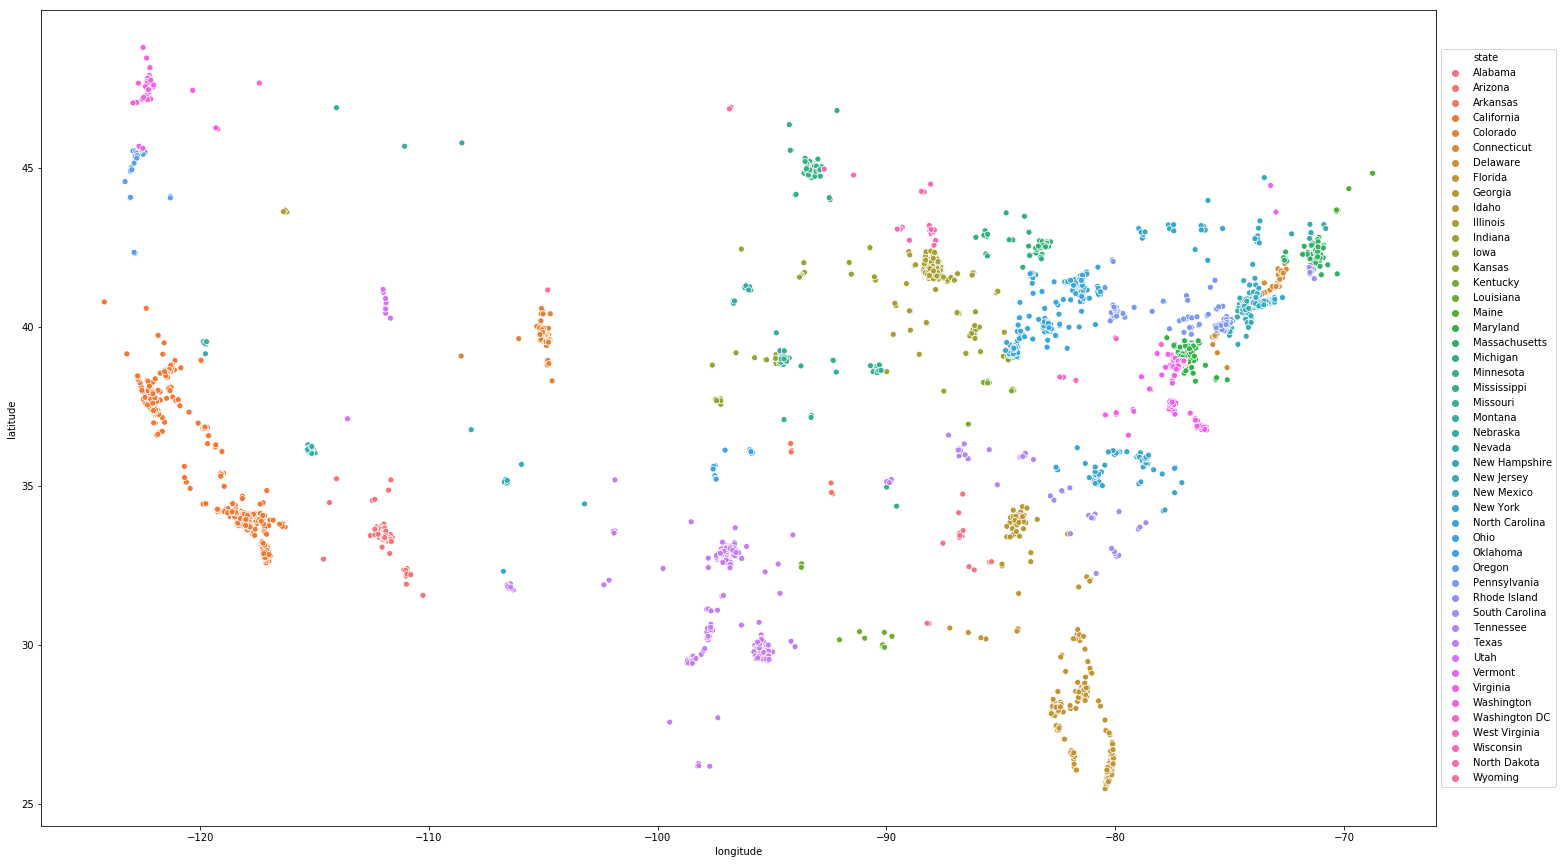

In [4]:
plt.figure(figsize=(25,15))
g = sns.scatterplot(x=df['longitude'], y= df['latitude'], data=df, hue='state')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('map.png', bbox_inches="tight")
plt.show()

#### The above map above clearly explains about in which states do we have the most of the chipotle stores 

In [5]:
df_new = df.state.value_counts().rename_axis('state1').reset_index(name='count')
new_df = pd.merge(df, df_new, left_on='state', right_on='state1', how='left').drop('state1', axis=1)

le = preprocessing.LabelEncoder()
new_df['state'] = le.fit_transform(new_df['state'])
new_df['location'] = le.fit_transform(new_df['location'])
new_df = new_df.drop(columns = ['address'])

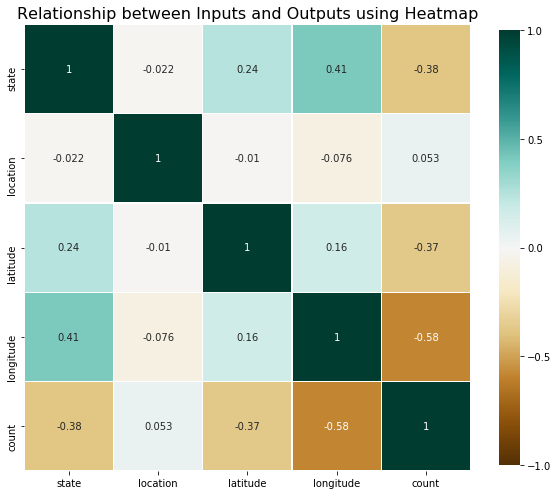

In [6]:
relation = new_df.corr()

fig = plt.figure(figsize = (10,10)) # Determines the size of the figure that will be displayed

ticks=[-1, -0.5 , 0 , +0.5, +1]  # Shows the interval of the colorbar displayed beside the heatmap

sns.heatmap(relation, vmin = -1, vmax = 1, square = True,center=0, cmap='BrBG', annot=True,robust=True, cbar_kws= {'shrink' : 0.8 , "ticks" : ticks}, linewidths= 0.2)
# vmin is the minimum range and vmax is the maximum range till which the heatmap will be displayed.
# cbar_kws shrinks the colobar to the same size as the heatmap
# linewidth is used to seperate the rows and coulnms by the given value to make the heatmap more presentable

plt.title("Relationship between Inputs and Outputs using Heatmap", fontsize = 16) ## Sets the title of the heatmap
plt.savefig('Heatmap.png', bbox_inches="tight")
plt.show() ## Displaying the heatmap

### Random Forest Model

In [7]:
X = new_df.drop(columns = ['count'])
y = new_df[['count']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

RandomForestmodel = RandomForestRegressor()
RandomForestmodel.fit(X_train,y_train)
y_pred = RandomForestmodel.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score_model = r2_score(y_test, y_pred)
print("RMSE value of the model is:", rmse)
print("R2 Score of the model is:", r2_score_model)

C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE value of the model is: 19.83858245821429
R2 Score of the model is: 0.9770097215189895


### Logistic Regression

In [8]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score_model = r2_score(y_test, y_pred)
print("RMSE value of the model is:", rmse)
print("R2 Score of the model is:", r2_score_model)

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSE value of the model is: 83.49809345693019
R2 Score of the model is: 0.5927359493901839


C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### ElasticNet Regression

In [9]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    score = r2_score(y_test,pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.45, MSE:9451.03, RMSE:97.22
Alpha:0.0010, R2:0.45, MSE:9451.04, RMSE:97.22
Alpha:0.0100, R2:0.45, MSE:9451.12, RMSE:97.22
Alpha:0.1000, R2:0.45, MSE:9451.92, RMSE:97.22
Alpha:0.3000, R2:0.45, MSE:9453.72, RMSE:97.23
Alpha:0.5000, R2:0.45, MSE:9455.57, RMSE:97.24
Alpha:0.7000, R2:0.45, MSE:9457.46, RMSE:97.25
Alpha:1.0000, R2:0.45, MSE:9460.35, RMSE:97.26
